In [1]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host files.pythonhosted.org -r requirements.txt --cert DSOCA50.pem --cert DSOVisibilityCA.pem --cert cacert.pem

In [2]:
!nvidia-smi

Fri Dec  1 02:26:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A40          Off  | 00000000:01:00.0 Off |                    0 |
|  0%   34C    P8    34W / 300W |      0MiB / 45634MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!nproc

96


In [4]:
import sys 
sys.path.insert(0, "./RL_attempt/") 

In [5]:
import agent, dataloader, environment, GCN, params, representations, utils, uvfa

In [6]:
import os
os.environ['DGLBACKEND'] = 'pytorch'
import json 

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import dgl 
import networkx as nx 

#import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np 

import rdkit
from rdkit import Chem
import molmass

initial graph with no edges
tensor([[6., 0., 4.],
        [6., 0., 4.],
        [6., 0., 4.],
        [6., 0., 4.],
        [6., 0., 4.],
        [6., 0., 4.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.]])
tensor([], dtype=torch.int32)


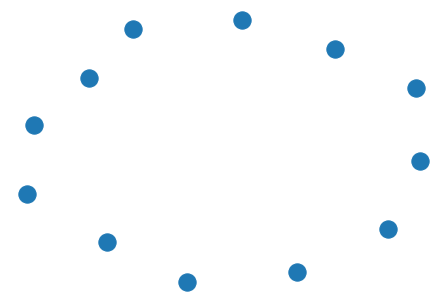

In [7]:
form1 = "C6H12O6" 
g1 = utils.get_init_graph(form1) 
G1 = dgl.to_networkx(g1) 
print("initial graph with no edges") 
print(g1.ndata['features'])
print(g1.edata['bondTypes'])
nx.draw(G1) 

initial benzene graph
tensor([[6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.],
        [8., 0., 2.]])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=torch.int32)


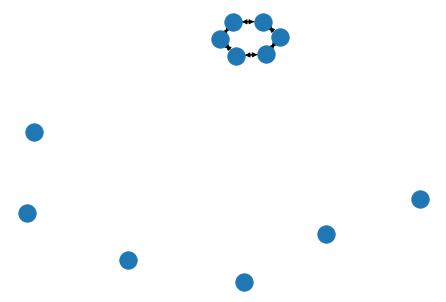

In [8]:
g1_b = utils.get_init_one_benzene_graph(form1) 
G1_b = dgl.to_networkx(g1_b) 
print("initial benzene graph") 
print(g1_b.ndata['features']) 
print(g1_b.edata['bondTypes']) 
nx.draw(G1_b)
# rerun until distance between nodes is far enough to see benzene ring 

AssertionError('Not enough carbon atoms!')


initial naphthalene graph
tensor([[6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 0.],
        [6., 0., 0.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 4.],
        [6., 0., 4.]])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       dtype=torch.int32)


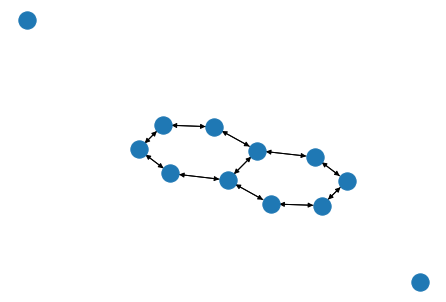

In [11]:
# this will give error 
try: 
    g1_b = utils.get_init_two_benzene_graph(form1) 
    print("SUCCESS") 
except Exception as e: 
    print(repr(e))

print() 
print() 

form2 = "C12H22" # no other atoms so that networkx algorithm will more likely have gap between nodes 
g2 = utils.get_init_naphthalene_graph(form2) 
G2 = dgl.to_networkx(g2) 
print("initial naphthalene graph") 
print(g2.ndata['features']) 
print(g2.edata['bondTypes']) 
nx.draw(G2)

initial 2 benzene graph
tensor([[6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.],
        [6., 0., 1.]])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       dtype=torch.int32)


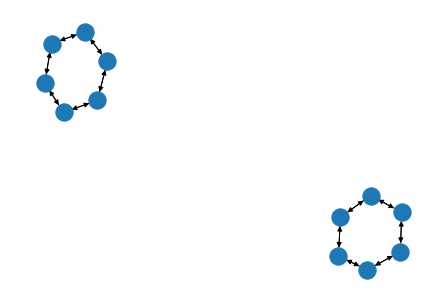

In [10]:
g2_b = utils.get_init_two_benzene_graph(form2) 
G2_b = dgl.to_networkx(g2_b) 
print("initial 2 benzene graph") 
print(g2_b.ndata['features']) 
print(g2_b.edata['bondTypes']) 
nx.draw(G2_b)